# HEART DISEASE PREDICTION

## Heart Disease Prediction using SVM

## Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

## Data Collection and Pre-Processing

In [2]:
#Importing the dataset
data = pd.read_csv('Heart_data.csv');

In [3]:
# printing the first 5 rows of the dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# printing the last 5 rows of the dataset
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# The number of rows and columns in the dataset
data.shape

(303, 14)

In [6]:
# Getting some info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Checking for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# statistical measures
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Checking the count of values
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [10]:
# 1-> Defective heart
# 0-> Non-Defective heart
x = data.drop(columns = 'target', axis = 1)
y = data['target']

In [11]:
# 'x' is containing the independent variables for predicting 'y'
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [12]:
# 'y' is the dependent variable depends on the 'x' for prediction
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


## Splitting the dataset

In [13]:
# Splitting the data into training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2, test_size = 0.2, stratify = y)

In [14]:
# x.shape for determining the no.of rows and columns in the 'x'
# x_train.shape for determining the no.of rows and columns in the 'x_train.shape'
# x_test.shape for determining the no.of rows and columns in the 'x_test.shape'
print(x.shape, x_train.shape, x_test.shape)

(303, 13) (242, 13) (61, 13)


## Feature Scaling

In [15]:
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

## Importing SVM Classifier

In [16]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(x_test)

In [17]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

## Calculating the Accuracy Score

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", accuracy)

Accuracy Score:  0.819672131147541


## Classfication Report

In [19]:
#Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report: ")
print(report)

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



## Confusion Matrix

In [20]:
#Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(matrix)

Confusion Matrix: 
[[21  7]
 [ 4 29]]


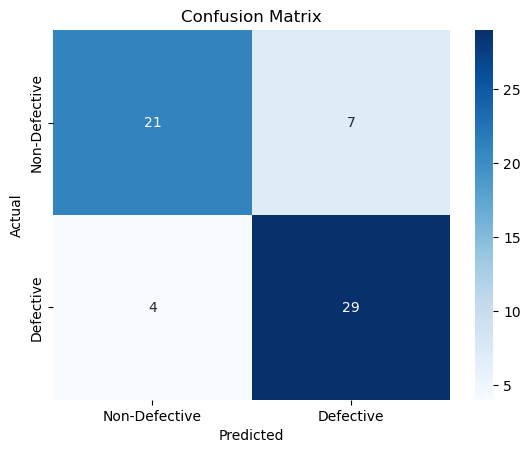

In [21]:
#Visualizing the confusion matrix

sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Defective', 'Defective'],
            yticklabels=['Non-Defective', 'Defective'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Conclusion**

In this project, the two classification models :— LOGISTIC REGRESSION AND SUPPORT VECTOR MACHINE (SVM) to predict whether a person is likely to have a heart disease based on various health parameters.

- The SVM model achieved an accuracy score of 81.96% on the test data.
- The Logistic Regression model showed a training accuracy of 85.12% and a test accuracy of 81.96%, indicating that it generalized well without significant overfitting.

Both models performed similarly on the test set, with Logistic Regression having a slightly higher training accuracy. This suggests that either model is suitable for this binary classification problem, but Logistic Regression offers slightly better interpretability and training performance, while SVM may be preferred if decision boundaries are more complex in future data.

Overall, both models are effective, and further improvement can be achieved with hyperparameter tuning, feature selection, or trying more advanced models such as Random Forest or Gradient Boosting.

                        ************************************************************************